In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import csv

In [8]:
# Read training dataset and collect set of humans and bots.
with open('data/train.csv', 'r') as train_file:
    humans, bots = set(), set()
    train_file_reader = csv.reader(train_file, delimiter=',')
    train_file_reader.next()
    for row in train_file_reader:
        if float(row[-1]) == 0:
            humans.add(row[0])
        else:
            bots.add(row[0])

In [9]:
# Read bid dataset that contains other data for learning.
with open('data/bids.csv', 'r') as bid_file:
    humans_dict, bots_dict = {}, {}
    bid_file_reader = csv.reader(bid_file, delimiter=',')
    bid_file_reader.next()
    for row in bid_file_reader:
        if row[1] in humans:
            humans_dict[row[1]] = row
        else:
            bots_dict[row[1]] = row

length of data:  1881
mean:  15.9879949692
sd:  6.22757311538e-09


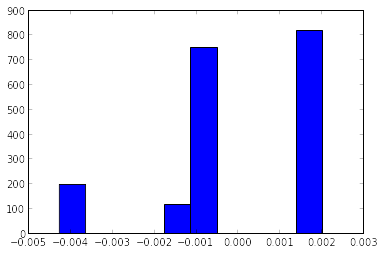

In [35]:
# compute mean and var of human data
human_timestamps = []
for _, val in humans_dict.iteritems():
    human_timestamps.append(float(val[5]))
mean = np.log10(np.mean(human_timestamps))
sd = 0.5**np.log10(np.var(human_timestamps))
print 'length of data: ', len(human_timestamps)
print 'mean: ', mean
print 'sd: ', sd


adjusted_data = map(lambda x: x-mean, map(np.log10, human_timestamps))

samples = np.random.normal(mean, sd, 2000)
plt.hist(adjusted_data)
plt.show()

length of data:  4733
mean:  15.9880756506
sd:  6.29314019015e-09


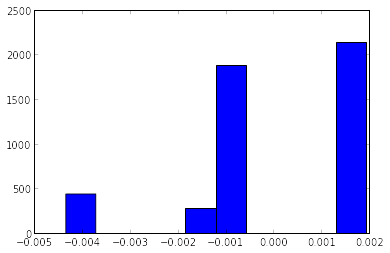

In [37]:
# compute mean and var of bot data
bots_timestamps = []
for _, val in bots_dict.iteritems():
    bots_timestamps.append(float(val[5]))
mean = np.log10(np.mean(bots_timestamps))
sd = 0.5**np.log10(np.var(bots_timestamps))
print 'length of data: ', len(bots_timestamps)
print 'mean: ', mean
print 'sd: ', sd

adjusted_data = map(lambda x: x - mean, map(np.log10, bots_timestamps))

samples = np.random.normal(mean, sd, 2000)
plt.hist(adjusted_data)
plt.show()